# PROYECT SETUP

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATA

In [4]:
worlds = pd.read_csv(r"C:\..\worlds_lol_cleaned.csv")

In [5]:
worlds.head()

,TeamName,PlayerName,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,...,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills,Country,FlashKeybind
0,Top Esports,369,Top,8,0.500,3.1,2.5,2.4,4.9,7.6,...,0.13,322,5,424,0.000,0.25,0,2,China,D
1,Dplus KIA,aiming,Adc,9,0.333,4.8,5.0,2.0,4.7,10.1,...,0.10,-112,1,97,0.333,0.00,0,2,South Korea,F
2,MAD Lions KOI,alvaro,Support,5,0.200,1.5,0.2,4.4,6.2,1.2,...,0.49,-3,2,-256,0.000,0.60,0,-,Spain,D
3,Team Liquid,apa,Mid,10,0.500,2.4,3.5,3.2,4.2,8.7,...,0.18,278,2,216,0.400,0.00,0,3,United States,D
4,PSG Talon,azhi,Top,5,0.200,2.3,2.2,3.0,4.8,7.5,...,0.18,-311,-10,-168,0.200,0.00,0,-,Taiwan,D


In [6]:
print("Dataset shape:", worlds.shape)

Dataset shape: (81, 27)


In [7]:
worlds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TeamName       81 non-null     object 
 1   PlayerName     81 non-null     object 
 2   Position       81 non-null     object 
 3   Games          81 non-null     int64  
 4   Win rate       81 non-null     float64
 5   KDA            81 non-null     float64
 6   Avg kills      81 non-null     float64
 7   Avg deaths     81 non-null     float64
 8   Avg assists    81 non-null     float64
 9   CSPerMin       81 non-null     float64
 10  GoldPerMin     81 non-null     int64  
 11  KP%            81 non-null     float64
 12  DamagePercent  81 non-null     float64
 13  DPM            81 non-null     int64  
 14  VSPM           81 non-null     float64
 15  Avg WPM        81 non-null     float64
 16  Avg WCPM       81 non-null     float64
 17  Avg VWPM       81 non-null     float64
 18  GD@15       

# DATA PREPROCESSING

In [9]:
# Is there any missing values?
worlds.isnull().sum()

TeamName         0
PlayerName       0
Position         0
Games            0
Win rate         0
KDA              0
Avg kills        0
Avg deaths       0
Avg assists      0
CSPerMin         0
GoldPerMin       0
KP%              0
DamagePercent    0
DPM              0
VSPM             0
Avg WPM          0
Avg WCPM         0
Avg VWPM         0
GD@15            0
CSD@15           0
XPD@15           0
FB %             0
FB Victim        0
Penta Kills      0
Solo Kills       0
Country          0
FlashKeybind     0
dtype: int64

In [10]:
# Is there any duplicated rows?
worlds.duplicated().sum()

0

In [11]:
# Statistics
worlds.describe()

,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,GoldPerMin,KP%,DamagePercent,...,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.00000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,8.641975,0.455975,3.765432,2.686420,2.875309,6.755556,6.65679,362.654321,0.680790,0.199605,...,1.768025,0.743333,0.350988,0.269259,-36.753086,-0.469136,-17.876543,0.291654,0.098086,0.0
std,2.908215,0.214833,1.834677,1.519355,0.896734,2.390293,3.04885,72.095797,0.088962,0.084498,...,1.031010,0.676966,0.119610,0.162471,324.379081,5.886609,301.186752,0.203314,0.128330,0.0
min,3.000000,0.000000,1.200000,0.200000,1.300000,1.800000,1.00000,225.000000,0.410000,0.052000,...,0.760000,0.230000,0.100000,0.060000,-1172.000000,-16.000000,-797.000000,0.000000,0.000000,0.0
25%,6.000000,0.333000,2.400000,1.200000,2.400000,4.900000,5.70000,320.000000,0.623000,0.135000,...,1.100000,0.380000,0.250000,0.160000,-207.000000,-4.000000,-183.000000,0.143000,0.000000,0.0
50%,8.000000,0.500000,3.400000,2.500000,2.900000,6.200000,7.90000,385.000000,0.691000,0.215000,...,1.350000,0.450000,0.370000,0.190000,-3.000000,0.000000,6.000000,0.250000,0.077000,0.0
75%,10.000000,0.615000,4.400000,3.900000,3.300000,8.300000,8.90000,416.000000,0.751000,0.275000,...,1.700000,0.530000,0.430000,0.380000,159.000000,3.000000,147.000000,0.444000,0.143000,0.0
max,14.000000,0.875000,9.300000,5.600000,5.600000,12.400000,10.50000,486.000000,0.849000,0.337000,...,4.250000,2.430000,0.590000,0.670000,741.000000,10.000000,749.000000,0.800000,0.600000,0.0


In [12]:
# Outliers Analysis
def identify_outliers(worlds, column):
    """
    Identifies and returns the outliers of a numeric column in a dataframe.
    
    Args:
    worlds (pd.DataFrame): The dataframe containing the data.
    column (str): The name of the column to analyze.
    
    Returns:
    pd.DataFrame: A subset of the dataframe with the rows considered as outliers.
    """
    # Calculate quartiles and IQR
    Q1 = worlds[column].quantile(0.25)  # First Quartile
    Q3 = worlds[column].quantile(0.75)  # Third Quartile
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter outliers
    outliers = worlds[(worlds[column] < lower_bound) | (worlds[column] > upper_bound)]
    
    # Print
    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Outliers Number: {len(outliers)}")
    
    # Return Subset
    return outliers

In [13]:
# Select numeric columns
numeric_columns = worlds.select_dtypes(include=['float64', 'int64']).columns

# Analyze outliers for all numeric columns
for col in numeric_columns:
    outliers = identify_outliers(worlds, col)
    print(outliers)

Column: Games
Lower Bound: 0.00, Upper Bound: 16.00
Outliers Number: 0
Empty DataFrame
Columns: [TeamName, PlayerName, Position, Games, Win rate, KDA, Avg kills, Avg deaths, Avg assists, CSPerMin, GoldPerMin, KP%, DamagePercent, DPM, VSPM, Avg WPM, Avg WCPM, Avg VWPM, GD@15, CSD@15, XPD@15, FB %, FB Victim, Penta Kills, Solo Kills, Country, FlashKeybind]
Index: []

[0 rows x 27 columns]
Column: Win rate
Lower Bound: -0.09, Upper Bound: 1.04
Outliers Number: 0
Empty DataFrame
Columns: [TeamName, PlayerName, Position, Games, Win rate, KDA, Avg kills, Avg deaths, Avg assists, CSPerMin, GoldPerMin, KP%, DamagePercent, DPM, VSPM, Avg WPM, Avg WCPM, Avg VWPM, GD@15, CSD@15, XPD@15, FB %, FB Victim, Penta Kills, Solo Kills, Country, FlashKeybind]
Index: []

[0 rows x 27 columns]
Column: KDA
Lower Bound: -0.60, Upper Bound: 7.40
Outliers Number: 5
       TeamName PlayerName Position  Games  Win rate  KDA  Avg kills  \
14        Gen.G      chovy      Mid     10     0.700  7.8        5.3   
29  

#### OBSERVATIONS

GENG Chovy, GENG Peyz, T1 Keria, T1 Gumayusi and LNG Scout had a KDA greater than 7.4

DK Moham and G2 Mikyx had a high average death number. They are supports, so this outlier could be explained by the nature of the role in teamfights. It's important to know that initiator champions were predominantly played during Worlds.

DK Kingen had a low Kill Participation. This could be explained by a strategy of the team or player. He could be splitpushing rather than being in teamfights.

In [18]:
identify_outliers(worlds,"VSPM")["VSPM"]

Column: VSPM
Lower Bound: 0.20, Upper Bound: 2.60
Outliers Number: 16


2     3.59
9     3.75
15    3.68
17    4.25
18    3.77
22    3.52
30    3.86
36    3.29
38    3.94
43    3.72
44    3.71
50    3.58
51    4.10
52    3.90
55    4.08
73    3.47
Name: VSPM, dtype: float64

In [19]:
identify_outliers(worlds,"Avg WPM")["Avg WPM"]

Column: Avg WPM
Lower Bound: 0.15, Upper Bound: 0.76
Outliers Number: 16


2     1.91
9     1.98
15    1.70
17    2.39
18    1.95
22    1.99
30    2.06
36    1.71
38    2.43
43    2.37
44    2.16
50    1.73
51    2.22
52    2.22
55    2.36
73    2.03
Name: Avg WPM, dtype: float64

In [20]:
(worlds["Position"] == "Support").sum()

16

There are 16 Support players in the dataset and all had high Vision and Ward Placement scores. This is explained by the nature of the role in the game. This lead me to question if there are outliers between support players.

In [22]:
supports = worlds[worlds["Position"] == "Support"]

# Calculate quartiles and IQR
Q1 = supports["VSPM"].quantile(0.25)  # First Quartile
Q3 = supports["VSPM"].quantile(0.75)  # Third Quartile
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = supports[(supports["VSPM"] < lower_bound) | (supports["VSPM"] > upper_bound)]
    
# Print
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Outliers Number: {len(outliers)}")
print(outliers)

Lower Bound: 3.10, Upper Bound: 4.39
Outliers Number: 0
Empty DataFrame
Columns: [TeamName, PlayerName, Position, Games, Win rate, KDA, Avg kills, Avg deaths, Avg assists, CSPerMin, GoldPerMin, KP%, DamagePercent, DPM, VSPM, Avg WPM, Avg WCPM, Avg VWPM, GD@15, CSD@15, XPD@15, FB %, FB Victim, Penta Kills, Solo Kills, Country, FlashKeybind]
Index: []

[0 rows x 27 columns]


In [28]:
# Calculate quartiles and IQR
Q1 = supports["Avg WPM"].quantile(0.25)  # First Quartile
Q3 = supports["Avg WPM"].quantile(0.75)  # Third Quartile
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = supports[(supports["Avg WPM"] < lower_bound) | (supports["Avg WPM"] > upper_bound)]
    
# Print
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Outliers Number: {len(outliers)}")
print(outliers)

Lower Bound: 1.47, Upper Bound: 2.73
Outliers Number: 0
Empty DataFrame
Columns: [TeamName, PlayerName, Position, Games, Win rate, KDA, Avg kills, Avg deaths, Avg assists, CSPerMin, GoldPerMin, KP%, DamagePercent, DPM, VSPM, Avg WPM, Avg WCPM, Avg VWPM, GD@15, CSD@15, XPD@15, FB %, FB Victim, Penta Kills, Solo Kills, Country, FlashKeybind]
Index: []

[0 rows x 27 columns]


There are no outliers between supports players in terms of vision and ward placement.

The only player with a high gold difference at 15 minutes number is T1 Faker. This reforces the idea that he is the best player in the game.

MDK Supa had a high experience difference at 15 minutes score. This means that he had an outstanding performance at the early stages of the game. It could be laning phase, farming, kill participation. 

# DESCRIPTIVE ANALYSIS

### Which teams have the best stats (KDA, KP%, DMG%)?

<Axes: title={'center': 'Worlds Teams Performance'}, xlabel='TeamName'>

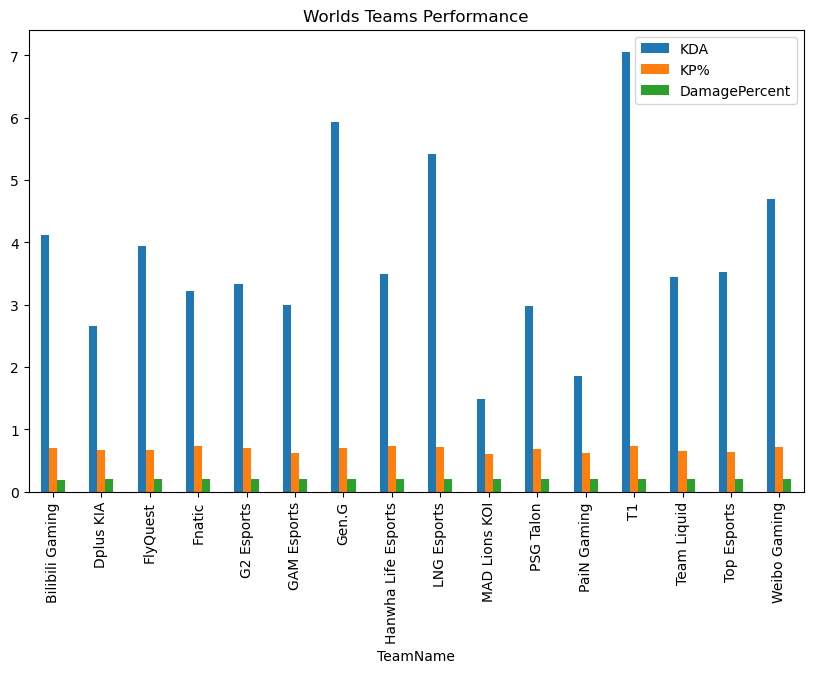

In [44]:
team_stats = worlds.groupby("TeamName")[["KDA", "KP%", "DamagePercent"]].mean()
team_stats.plot(kind="bar", figsize=(10, 6), title="Worlds Teams Performance")

### How important is farming (CSPerMin) to have a high KDA?

Text(9.0, 9.3, 'LNG Scout')

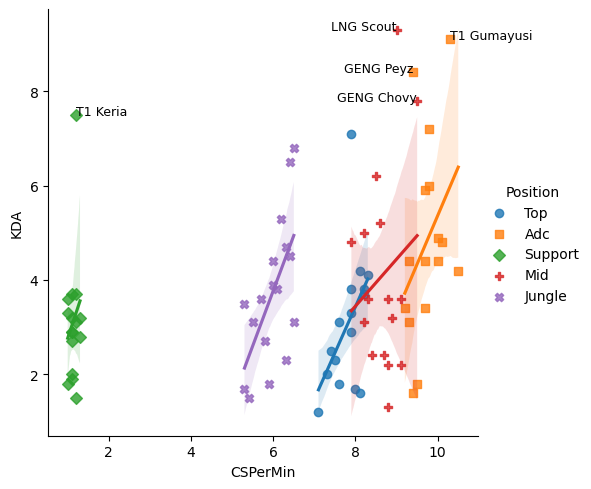

In [46]:
# Correlation between CS per minute and KDA
sns.lmplot(data=worlds, x="CSPerMin", y="KDA", hue="Position", markers=["o", "s", "D", "P", "X"])
plt.text(1.2, 7.5, "T1 Keria", fontsize = 9, ha="left")
plt.text(10.3, 9.1, "T1 Gumayusi", fontsize = 9, ha="left")
plt.text(9.5, 7.8, "GENG Chovy", fontsize = 9, ha="right")
plt.text(9.4, 8.4, "GENG Peyz", fontsize = 9, ha="right")
plt.text(9.0, 9.3, "LNG Scout", fontsize = 9, ha="right")

### How important is getting gold per minute (GoldPerMin) to have a high KDA?

Text(430, 9.3, 'LNG Scout')

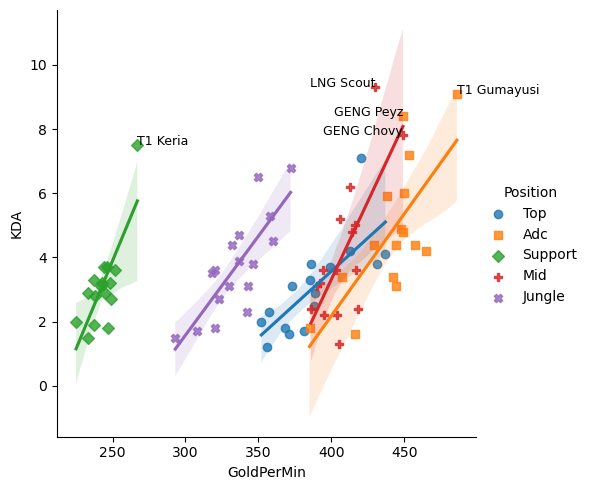

In [49]:
# Correlation between CS per minute and KDA
sns.lmplot(data=worlds, x="GoldPerMin", y="KDA", hue="Position", markers=["o", "s", "D", "P", "X"])
plt.text(267, 7.5, "T1 Keria", fontsize = 9, ha="left")
plt.text(486, 9.1, "T1 Gumayusi", fontsize = 9, ha="left")
plt.text(449, 7.8, "GENG Chovy", fontsize = 9, ha="right")
plt.text(449, 8.4, "GENG Peyz", fontsize = 9, ha="right")
plt.text(430, 9.3, "LNG Scout", fontsize = 9, ha="right")

### Does a better farming lead you to getting more gold?

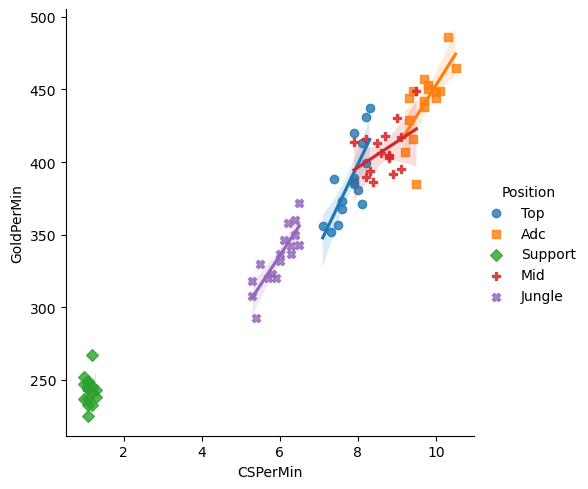

In [51]:
# Correlation between CS per minute and GoldPerMin
sns.lmplot(data=worlds, x="CSPerMin", y="GoldPerMin", hue="Position", markers=["o", "s", "D", "P", "X"])

In [52]:
# Calculate correlation matrix for each role

roles = worlds["Position"].unique()
for role in roles:
    role_data = worlds[worlds["Position"] == role]
    role_stats = role_data[["KDA", "CSPerMin", "GoldPerMin"]]
    role_correlation_matrix = role_stats.corr()
    print(role)
    print(role_correlation_matrix)

Top
                 KDA  CSPerMin  GoldPerMin
KDA         1.000000  0.481952    0.749681
CSPerMin    0.481952  1.000000    0.763518
GoldPerMin  0.749681  0.763518    1.000000
Adc
                 KDA  CSPerMin  GoldPerMin
KDA         1.000000  0.367249    0.711564
CSPerMin    0.367249  1.000000    0.683418
GoldPerMin  0.711564  0.683418    1.000000
Support
                 KDA  CSPerMin  GoldPerMin
KDA         1.000000  0.183631    0.772891
CSPerMin    0.183631  1.000000   -0.002764
GoldPerMin  0.772891 -0.002764    1.000000
Mid
                 KDA  CSPerMin  GoldPerMin
KDA         1.000000  0.188526    0.725032
CSPerMin    0.188526  1.000000    0.449203
GoldPerMin  0.725032  0.449203    1.000000
Jungle
                KDA  CSPerMin  GoldPerMin
KDA         1.00000  0.629210    0.797700
CSPerMin    0.62921  1.000000    0.853688
GoldPerMin  0.79770  0.853688    1.000000


### OBSERVATIONS

Farming and getting gold is not correlated for supports. This is because they are focused on vision, team plays and map control.

The highest correlation between CS and Gold per minute is for Junglers. Farmer junglers tend to get more gold.

Farming is more important for junglers and top laners than for ADCs and mid laners when it comes to achieving a good performance.  

# Does a good early performance (GD@15, CSD@15, XPD@15) impacts on winning a game (Win rate)? 

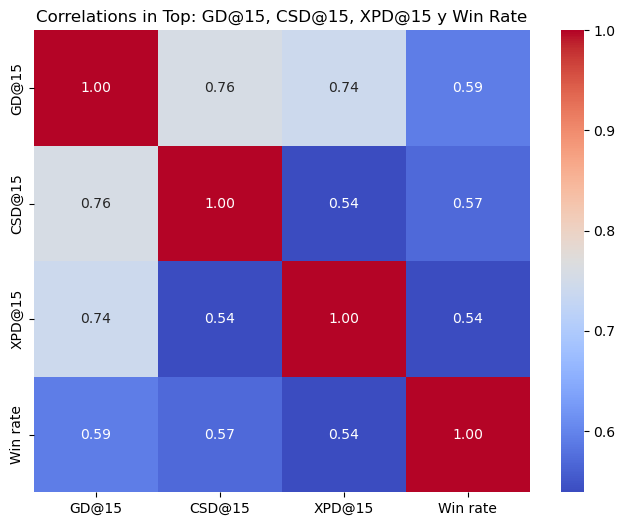

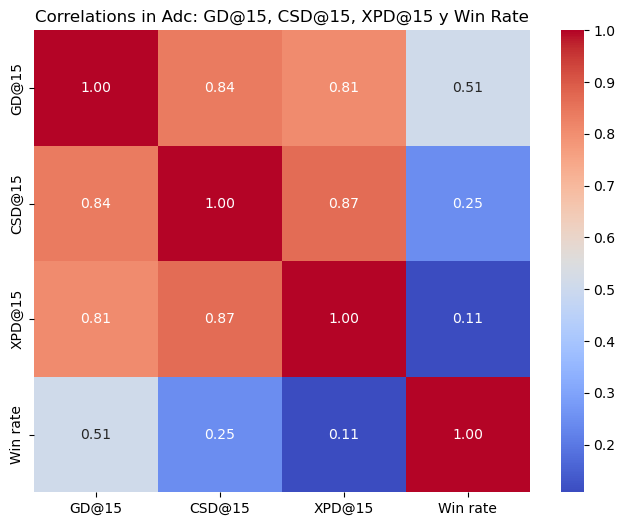

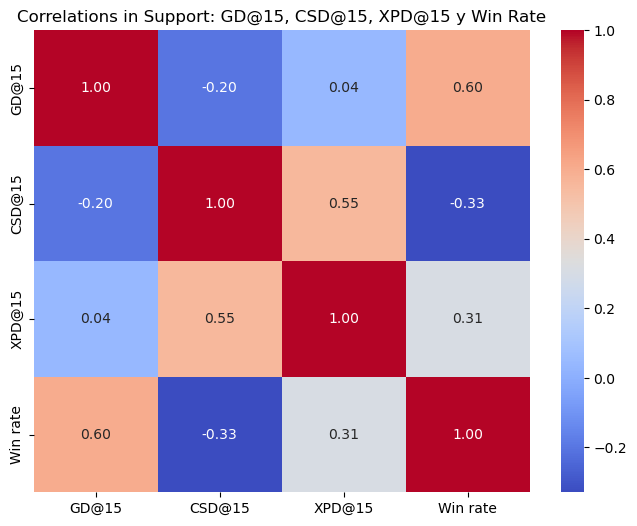

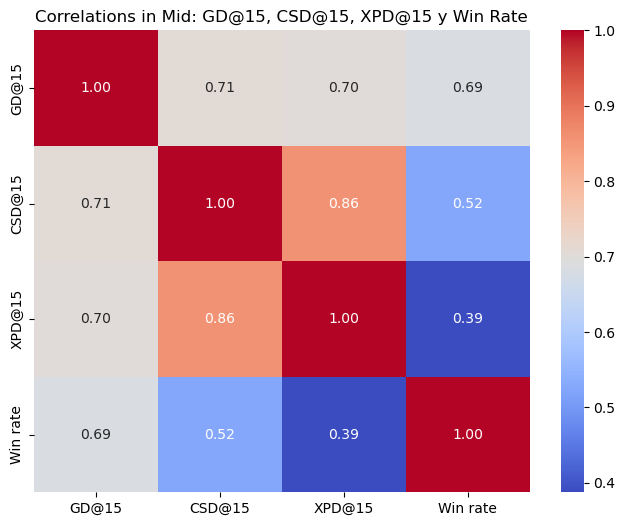

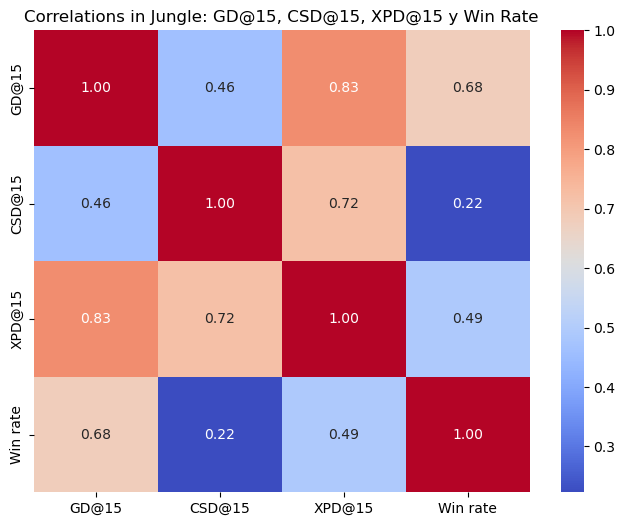

In [59]:
# Visualize each correlation in a heatmap
for role in roles:
    role_data = worlds[worlds["Position"] == role]
    role_corr = role_data[["GD@15", "CSD@15", "XPD@15", "Win rate"]].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(role_corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlations in {role}: GD@15, CSD@15, XPD@15 y Win Rate")
    plt.show()

### OBSERVATIONS

### Top:
- Early game performance and win rate have a strong relation. This suggests that laning phase is crucial for toplaners, meaning that they need a strong early game to gain an advantage, whether through matchups, champion strength, or farm. 
### Adc:
- ADCs' early game metrics have the lowest impact on winning. This indicates that ADC performance in the early game is less decisive in determining the outcome of the match. For ADC players, it’s more about playing in sync with the team and making a larger impact later in the game. 
### Support:
- Some correlations are lower than zero, particularly with Creep Score Difference and Experience Difference. This suggests that the typical metrics for other roles, such as farming and experience gain, may not fully capture a Support player’s impact.
### Mid:
- Gold difference and farming also have a strong correlation with Win Rate for midlaners, suggesting that mid lane performance in the early game is critical.
- Experience difference at 15 minutes shows a low correlation with win rate. This suggests that roaming, securing objectives (like dragons or Rift Heralds), and assisting other lanes are more impactful for midlaners than simply staying in lane to farm XP.
### Jungle:
- Gold and experience difference at 15 minutes have a strong correlation, highlighting that efficient jungling is crucial.
- Creep Score Difference at 15 minutes does not correlate strongly with win rate, indicating that effective ganking, map control, and objective securing are more critical for junglers than their personal CS performance.
### In general:
- For most roles, early game performance is a strong indicator of win rate, particularly for Top, Mid, and Jungle.
- Support performance seems to be less about CS and XP.

# Is better flash in D than in F key?

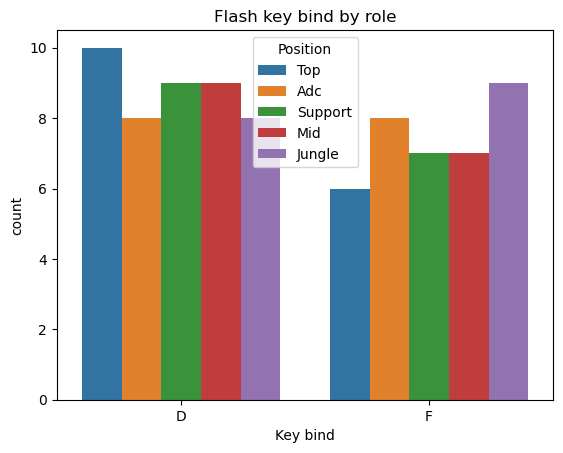

In [87]:
sns.countplot(x="FlashKeybind", hue="Position", data=worlds)
plt.title("Flash key bind by role")
plt.xlabel("Key bind")
plt.show()

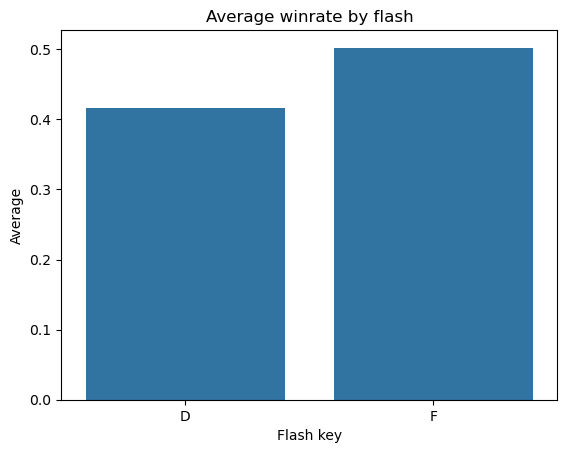

In [127]:
flash_stats = worlds.groupby("FlashKeybind")[["GD@15", "CSD@15", "XPD@15", "Win rate"]].mean()

# Winrate Barplot
sns.barplot(x="FlashKeybind", y="Win rate", data=flash_stats)
plt.title("Average winrate by flash")
plt.xlabel("Flash key")
plt.ylabel("Average")
plt.show()

<Axes: title={'center': 'Early Game Performance by Flash Key bind'}, xlabel='FlashKeybind'>

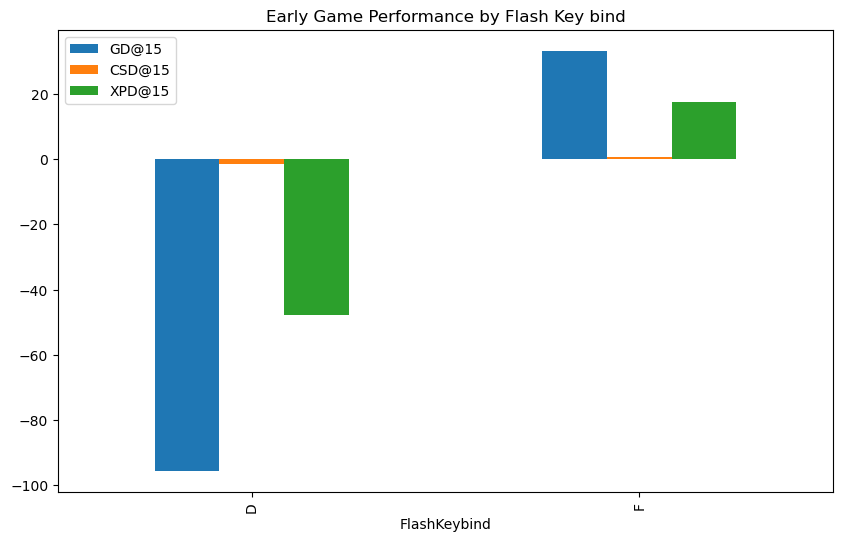

In [129]:
flash_stats = flash_stats.drop(columns=["Win rate"])
flash_stats.plot(kind="bar", figsize=(10, 6), title="Early Game Performance by Flash Key bind")